In [91]:
## This sample program performs binary addition using RNN in Keras
# Method 2 is much faster than Method 1
# Each bit has 0 and 1, meaning that we should have two columans for two features. 

import numpy as np
import sys
import os
import random
import keras


#change the working directory 
os.chdir('/notebooks/torch')

print("This program runs on version 2.0.6")
print("keras version "+keras.__version__)

This program runs on version 2.0.6
keras version 2.0.6


In [113]:
def genData(): 
    a1=random.randint(0,127)
    a2=random.randint(0,127)
    a3=a1+a2
    tmp1=np.unpackbits(np.uint8(a1))
    tmp2=np.unpackbits(np.uint8(a2))
    y=np.unpackbits(np.uint8(a3))
    tmp1=tmp1[::-1]
    tmp2=tmp2[::-1]
    y=y[::-1]
    tmp1=np.reshape(tmp1, (8,1))
    tmp2=np.reshape(tmp2, (8,1))
    X=np.concatenate((tmp1, tmp2),1)
    y=np.reshape(y,(8,1))
    X=np.expand_dims(X,0)
    y=np.expand_dims(y,0)
    return(X,y)


In [116]:
a,b=genData()
print(a)
print(b)

[[[0 0]
  [1 0]
  [1 0]
  [0 1]
  [1 1]
  [0 0]
  [0 0]
  [0 0]]]
[[[0]
  [1]
  [1]
  [1]
  [0]
  [1]
  [0]
  [0]]]


In [119]:
def addComplementCol(x, colDex):
    a=np.copy(x)
    if x.shape[0]!=1:
        print("error: can only handle shape[0]==1")
        return
    ones=np.ones((a.shape[1]), dtype=a.dtype)
    flipped=ones-a[0,...,colDex]
    flipped=np.reshape(flipped, (a.shape[1],1))
    flipped=np.expand_dims(flipped,0)
    a=np.concatenate((a, flipped),2)
    return(a)

In [120]:
a=addComplementCol(a, 0)
a=addComplementCol(a, 1)
print(a)

[[[0 0 1 1]
  [1 0 0 1]
  [1 0 0 1]
  [0 1 1 0]
  [1 1 0 0]
  [0 0 1 1]
  [0 0 1 1]
  [0 0 1 1]]]


In [123]:
tmpX, tmpy=genData()
tmpX=addComplementCol(tmpX, 0)
tmpX=addComplementCol(tmpX, 1)
tmpy=addComplementCol(tmpy, 0)
X=tmpX
y=tmpy
# Note the total combination is 127 x 127
NumSample=1000
print("Sample Percentage: "+str(NumSample/(127.*127.)*100))
for i in range(NumSample-1):
  tmpX, tmpy=genData()
  tmpX=addComplementCol(tmpX, 0)
  tmpX=addComplementCol(tmpX, 1)
  tmpy=addComplementCol(tmpy, 0)
  X=np.insert(X, 1, tmpX, axis=0)
  y=np.insert(y, 1, tmpy, axis=0)


Sample Percentage: 6.20001240002


In [124]:
print(X.shape)
print(y.shape)

(1000, 8, 4)
(1000, 8, 2)


In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape)
print(y_train.shape)

print("Training Sample Percentage: "+str(X_train.shape[0]/(127.*127.)*100))


(670, 8, 4)
(670, 8, 2)
Training Sample Percentage: 4.15400830802


In [126]:
# Build the model.
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.callbacks import ModelCheckpoint

isCheckpoint=False

model = Sequential()
#model.add(LSTM(256, input_dim=max_features, return_sequences=True))
feature_dim=4
model.add(LSTM(10, input_shape=(None, feature_dim), return_sequences=True))
#model.add(LSTM(256, return_sequences=True))
model.add(LSTM(10, return_sequences=True))
model.add(Dense(2))  #is it dense? or add(LSTM(max_features))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop')


# It is a best practice to use checkpoint 
callbacks_list=None
if isCheckpoint==True:
  filepath="weight/RNN_BinaryAddition_Method_2-{epoch:02d}-{val_loss:.2f}.hdf5"
  checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
  callbacks_list = [checkpoint]

history=model.fit(X_train, y_train, validation_split=0.15 ,batch_size=32, epochs=100,callbacks=callbacks_list)

print("finished")


Train on 569 samples, validate on 101 samples
Epoch 1/100
569/569 [==============================] - 0s - loss: 0.6931 - val_loss: 0.6916
Epoch 2/100
569/569 [==============================] - 0s - loss: 0.6916 - val_loss: 0.6901
Epoch 3/100
569/569 [==============================] - 0s - loss: 0.6903 - val_loss: 0.6890
Epoch 4/100
569/569 [==============================] - 0s - loss: 0.6892 - val_loss: 0.6870
Epoch 5/100
569/569 [==============================] - 0s - loss: 0.6879 - val_loss: 0.6848
Epoch 6/100
569/569 [==============================] - 0s - loss: 0.6868 - val_loss: 0.6838
Epoch 7/100
569/569 [==============================] - 0s - loss: 0.6858 - val_loss: 0.6822
Epoch 8/100
569/569 [==============================] - 0s - loss: 0.6849 - val_loss: 0.6810
Epoch 9/100
569/569 [==============================] - 0s - loss: 0.6839 - val_loss: 0.6805
Epoch 10/100
569/569 [==============================] - 0s - loss: 0.6831 - val_loss: 0.6794
Epoch 11/100
569/569 [===========

569/569 [==============================] - 0s - loss: 2.8045e-04 - val_loss: 2.6260e-04
Epoch 89/100
569/569 [==============================] - 0s - loss: 2.1511e-04 - val_loss: 1.9936e-04
Epoch 90/100
569/569 [==============================] - 0s - loss: 1.6352e-04 - val_loss: 1.5157e-04
Epoch 91/100
569/569 [==============================] - 0s - loss: 1.2460e-04 - val_loss: 1.1479e-04
Epoch 92/100
569/569 [==============================] - 0s - loss: 9.4703e-05 - val_loss: 8.7599e-05
Epoch 93/100
569/569 [==============================] - 0s - loss: 7.2149e-05 - val_loss: 6.6113e-05
Epoch 94/100
569/569 [==============================] - 0s - loss: 5.4774e-05 - val_loss: 5.0302e-05
Epoch 95/100
569/569 [==============================] - 0s - loss: 4.1661e-05 - val_loss: 3.8194e-05
Epoch 96/100
569/569 [==============================] - 0s - loss: 3.1917e-05 - val_loss: 2.9216e-05
Epoch 97/100
569/569 [==============================] - 0s - loss: 2.4610e-05 - val_loss: 2.2549e-05
Epo

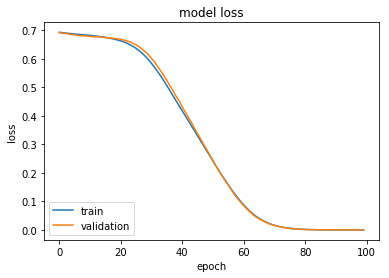

In [127]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')
plt.show()

In [128]:
score = model.evaluate(X_test, y_test, batch_size=1)

# predict(self, x, batch_size=32, verbose=0)

330/330 [==============================] - 0s     


In [129]:
print("score: "+str(score))

score: 1.04495821268e-05


In [130]:
print(X_test.shape)

(330, 8, 4)


In [131]:
predict_y=model.predict(X_test)

In [132]:
print(predict_y.shape)

(330, 8, 2)


In [133]:
print(X_test[0,...])  

[[0 1 1 0]
 [0 0 1 1]
 [1 1 0 0]
 [0 0 1 1]
 [0 0 1 1]
 [1 1 0 0]
 [1 1 0 0]
 [0 0 1 1]]


In [134]:
print(predict_y[0,...])  

[[  9.99994159e-01   5.82046914e-06]
 [  3.69184568e-06   9.99996305e-01]
 [  2.52773225e-06   9.99997497e-01]
 [  9.99995351e-01   4.62709386e-06]
 [  1.47461162e-06   9.99998569e-01]
 [  4.85186683e-06   9.99995112e-01]
 [  9.99987364e-01   1.25834267e-05]
 [  9.99999285e-01   6.73013233e-07]]


In [ ]:
#10001001

In [ ]:
#Another test   001110000011 + 001110000110 = 011100001001

In [135]:
a=np.zeros((1,12,4))

In [136]:
for i in range(a.shape[1]):
  a[0,i,2]=1
  a[0,i,3]=1


In [137]:
a[0,0,0]=1
a[0,0,2]=0

a[0,1,1]=1
a[0,1,3]=0

a[0,2,0]=1
a[0,2,2]=0

a[0,3,1]=1
a[0,3,3]=0

a[0,7,0]=1
a[0,7,2]=0

a[0,7,1]=1
a[0,7,3]=0

a[0,8,0]=1
a[0,8,2]=0

a[0,8,1]=1
a[0,8,3]=0

a[0,9,0]=1
a[0,9,2]=0

a[0,9,1]=1
a[0,9,3]=0


In [138]:
print(a) #  001110000101 + 001110001010 

[[[ 1.  0.  0.  1.]
  [ 0.  1.  1.  0.]
  [ 1.  0.  0.  1.]
  [ 0.  1.  1.  0.]
  [ 0.  0.  1.  1.]
  [ 0.  0.  1.  1.]
  [ 0.  0.  1.  1.]
  [ 1.  1.  0.  0.]
  [ 1.  1.  0.  0.]
  [ 1.  1.  0.  0.]
  [ 0.  0.  1.  1.]
  [ 0.  0.  1.  1.]]]


In [139]:
print(model.predict(a)) #ANS: 011100001111

[[[  9.99984503e-01   1.54469853e-05]
  [  9.99999881e-01   1.74275598e-07]
  [  9.99999046e-01   9.40228460e-07]
  [  9.99999762e-01   2.40691662e-07]
  [  1.54865484e-06   9.99998450e-01]
  [  3.30731200e-06   9.99996662e-01]
  [  3.22239976e-06   9.99996781e-01]
  [  1.22306528e-06   9.99998808e-01]
  [  9.99979615e-01   2.04205917e-05]
  [  9.99963045e-01   3.69311238e-05]
  [  9.99999046e-01   9.13160704e-07]
  [  1.98419389e-06   9.99997973e-01]]]
